In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle as astropy_ls

import matplotlib 
matplotlib.rc('xtick', labelsize=36) 
matplotlib.rc('ytick', labelsize=36) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)


In [2]:
# Create the pandas DataFrame
kois_LS_fit_df = pd.read_csv('holczer_LS_fit_July26.csv')

# Display the DataFrame
kois_LS_fit_df



,KOI,P_ttv [cycles],amplitude_ttv [min],delta_BIC,P_lin,P_ttv [days]
0,1.01,2.853987,1.328642e-02,-8.143485,2.470613,7.051100
1,2.01,2.008973,5.490948e-02,7.463235,2.204735,4.429253
2,3.01,3.138830,1.056643e-01,15.435857,4.887803,15.341984
3,5.01,10.926648,5.987540e-01,1.808215,4.780328,52.232961
4,7.01,2.584302,1.169016e+00,6.161470,3.213669,8.305091
...,...,...,...,...,...,...
2594,5958.01,3.532934,3.029475e+01,-1.158730,226.496097,800.195790
2595,5959.01,2.554113,7.188461e+01,16.715621,251.479044,642.305784
2596,5968.01,2.866667,3.449107e+01,11.146999,97.942772,280.769281
2597,5969.01,14.000000,2.376538e+02,2.052101,163.869589,2294.174246


In [14]:
holczer = kois_LS_fit_df[kois_LS_fit_df['delta_BIC'] > 10]
holczer




,KOI,P_ttv [cycles],amplitude_ttv [min],delta_BIC,P_lin,P_ttv [days]
2,3.01,3.138830,1.056643e-01,15.435857,4.887803,15.341984
6,12.01,69.921847,1.153954e+00,260.519694,17.855219,1248.469909
8,17.01,3.368362,1.112757e-01,10.630631,3.234699,10.895637
13,41.02,2.267717,3.266155e+01,241.972726,6.887125,15.618050
14,41.03,28.048104,5.875323e+01,101.518024,35.333128,991.027235
...,...,...,...,...,...,...
2590,5945.01,2.000000,5.559508e+15,75.115233,40.719409,81.438817
2592,5952.01,16.000000,3.572241e+02,38.596757,164.439615,2631.033835
2593,5955.01,2.751445,3.713080e+01,25.975905,96.329085,265.044188
2595,5959.01,2.554113,7.188461e+01,16.715621,251.479044,642.305784


In [32]:
exoplanet_archive_kois = pd.read_csv('kois_exoplanet_archive.csv')
exoplanet_archive_kois

,kepoi_name,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_count
0,752.01,CONFIRMED,9.488036,2.775000e-05,-2.775000e-05,2.26,0.26,-0.15,2
1,752.02,CONFIRMED,54.418383,2.479000e-04,-2.479000e-04,2.83,0.32,-0.19,2
2,753.01,CANDIDATE,19.899140,1.494000e-05,-1.494000e-05,14.60,3.92,-1.31,1
3,754.01,FALSE POSITIVE,1.736952,2.630000e-07,-2.630000e-07,33.46,8.50,-2.83,1
4,755.01,CONFIRMED,2.525592,3.761000e-06,-3.761000e-06,2.75,0.88,-0.35,1
...,...,...,...,...,...,...,...,...,...
9559,7985.01,FALSE POSITIVE,0.527699,1.160000e-07,-1.160000e-07,29.35,7.70,-2.57,1
9560,7986.01,CANDIDATE,1.739849,1.780000e-05,-1.780000e-05,0.72,0.24,-0.08,1
9561,7987.01,FALSE POSITIVE,0.681402,2.434000e-06,-2.434000e-06,1.07,0.36,-0.11,1
9562,7988.01,CANDIDATE,333.486169,4.235000e-03,-4.235000e-03,19.30,0.55,-4.68,1


In [33]:
    print(row)

KOI                    5968.010000
P_ttv [cycles]            2.866667
amplitude_ttv [min]      34.491065
delta_BIC                11.146999
P_lin                    97.942772
P_ttv [days]            280.769281
Name: 2596, dtype: float64


In [65]:
# Create an empty DataFrame with the specified columns
columns = ['KOI', 'P_ttv [cycles]', 'amplitude_ttv [min]', 'delta_BIC', 'P_lin [days]', 'P_ttv [days]', 'P_lin_archive [days]']
holczer_singles = pd.DataFrame(columns=columns)
holczer_2planet = pd.DataFrame(columns=columns)
holczer_multis = pd.DataFrame(columns=columns)


for index, row in holczer.iterrows():
    koi = row['KOI']
    row_dict = {col: value for col, value in zip(columns, row)}
    
    


    period = exoplanet_archive_kois.loc[
        exoplanet_archive_kois['kepoi_name'] == koi]['koi_period'].values
    disposition = exoplanet_archive_kois.loc[
        exoplanet_archive_kois['kepoi_name'] == koi]['koi_disposition'].values
    nplanets = exoplanet_archive_kois.loc[
        exoplanet_archive_kois['kepoi_name'] == koi]['koi_count'].values
    
    period = float(period)
    
    #define the koi of the star (ie koi-105.01 or koi-105.02 --> koi-105.)
    koi_star = str(koi)[:-2]
    planet_number = str(koi)[-1]
    # Use indexing to filter rows
    all_planets_around_koi = exoplanet_archive_kois[
        exoplanet_archive_kois['kepoi_name'].astype(str).str.startswith(koi_star)]
    
    
    # Append the value for 'P_lin_archive [days]' from the list to each row
    row_dict['P_lin_archive [days]'] = period

    
    if disposition != 'FALSE POSITIVE':
        if nplanets == 2:
            
            if planet_number == '1':
                koi_other_planet = float(koi_star+'0'+'2')
                period_pert = exoplanet_archive_kois.loc[
                    exoplanet_archive_kois['kepoi_name'] == koi_other_planet]['koi_period'].values
                
            elif planet_number == '2':
                koi_other_planet = float(koi_star+'0'+'1')
                period_pert = exoplanet_archive_kois.loc[
                    exoplanet_archive_kois['kepoi_name'] == koi_other_planet]['koi_period'].values
                
            else:
                print("ERROR, PLANET NUMBER NEITHER 1 NOR 2!!!")
                print("PLANET NUMBER = " + planet_number)
                
                
            # Append the value for 'P_lin_archive [days]' from the list to each row
            row_dict['P_pert_archive [days]'] = float(period_pert)

            holczer_2planet = holczer_2planet.append(row_dict, ignore_index=True)
        
        if nplanets > 1:
            holczer_multis = holczer_multis.append(row_dict, ignore_index=True)
        elif nplanets == 1:
            holczer_singles = holczer_singles.append(row_dict, ignore_index=True)
            
            
            
        
            
            


In [66]:
holczer_2planet

,KOI,P_ttv [cycles],amplitude_ttv [min],delta_BIC,P_lin [days],P_ttv [days],P_lin_archive [days],P_pert_archive [days]
0,46.01,4.099201,1.463645,20.390492,3.487688,14.296734,3.487689,6.029772
1,72.01,17.900162,1.763763,28.087351,0.837491,14.991224,0.837491,45.294223
2,72.02,11.058039,6.279137,30.232466,45.294294,500.866057,45.294223,0.837491
3,89.01,5.018341,24.316705,131.372569,84.687279,424.989613,84.687752,207.582931
4,89.02,12.000000,209.773843,165.513420,207.637045,2491.644546,207.582931,84.687752
...,...,...,...,...,...,...,...,...
410,4192.01,2.140071,37.382369,39.349831,18.053701,38.636197,18.054147,32.027317
411,4269.01,2.120935,48.176099,35.174196,26.656460,56.536622,26.656574,4.440854
412,4526.01,2.630875,82.297343,12.901553,30.538638,80.343327,30.539293,11.818729
413,4647.01,9.757293,94.327782,76.156995,37.903008,369.830750,37.904389,12.008552


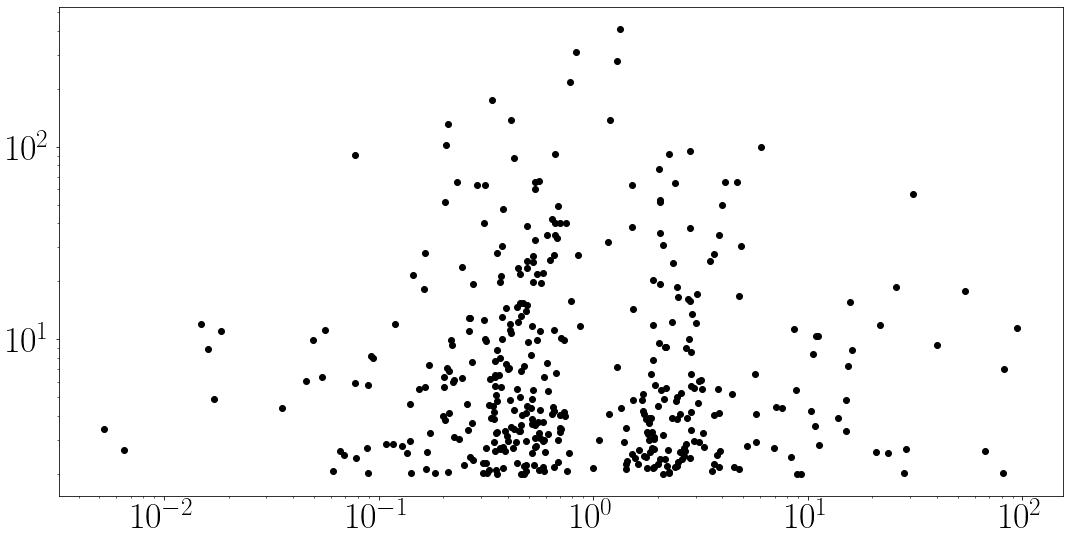

In [69]:
plt.figure(figsize=[18,9])


plt.plot(holczer_2planet['P_pert_archive [days]']/holczer_2planet['P_lin_archive [days]'],
         holczer_2planet['P_ttv [cycles]'],
         'ko')


plt.xscale('log')
plt.yscale('log')





In [38]:
holczer_multis

,KOI,P_ttv [cycles],amplitude_ttv [min],delta_BIC,P_lin [days],P_ttv [days],P_lin_archive [days]
0,41.02,2.267717,32.661551,241.972726,6.887125,15.618050,6.887071
1,41.03,28.048104,58.753230,101.518024,35.333128,991.027235,35.333193
2,46.01,4.099201,1.463645,20.390492,3.487688,14.296734,3.487689
3,70.01,4.184707,2.286248,53.563718,10.854092,45.421201,10.854096
4,70.02,2.680585,4.542492,110.528762,3.696122,9.907770,3.696121
...,...,...,...,...,...,...,...
907,4269.01,2.120935,48.176099,35.174196,26.656460,56.536622,26.656574
908,4500.02,8.971135,54.389091,60.860207,44.986959,403.584102,44.985188
909,4526.01,2.630875,82.297343,12.901553,30.538638,80.343327,30.539293
910,4647.01,9.757293,94.327782,76.156995,37.903008,369.830750,37.904389


In [ ]:
plt.plot()

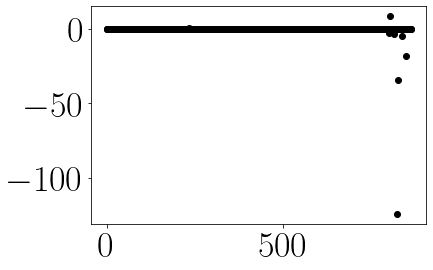

In [41]:
plt.plot(holczer_singles['P_lin_archive [days]'] - holczer_singles['P_lin [days]'],
         'ko')
                                                               
                                                               
                                                               
                                                               

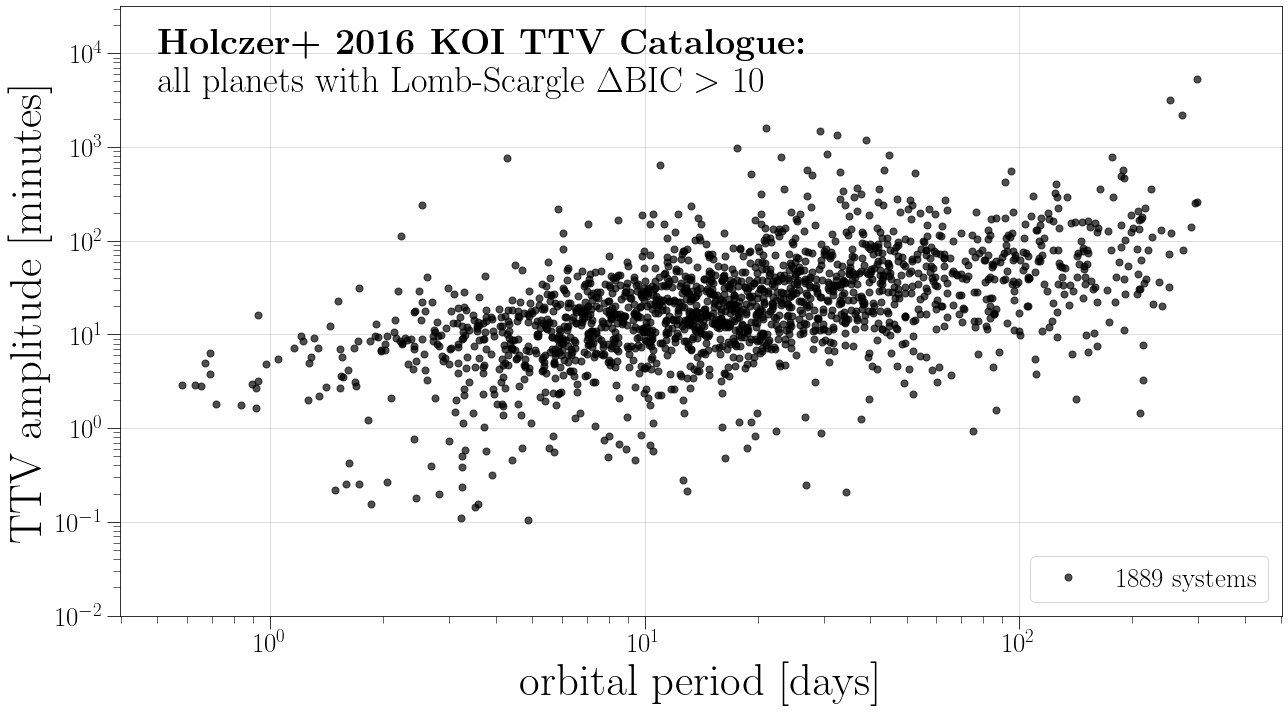

In [10]:
plt.figure(figsize=[18,10])


plt.plot(holczer['P_lin'],
         holczer['amplitude_ttv [min]'], 
         marker = 'o', markersize = '7', ls = '', color = 'k', alpha = .69, zorder=2,
         label = str(len(holczer)) + ' systems')


plt.xlabel(r'orbital period [days]', fontsize=45)
plt.ylabel(r'TTV amplitude [minutes]', fontsize=45)
plt.text(10**(-0.3),10**(4.0),r'\textbf{Holczer+ 2016 KOI TTV Catalogue:}', fontsize=36)
plt.text(10**(-0.3),10**(3.6),'all planets with Lomb-Scargle $\Delta$BIC $>$ 10', fontsize=36)
plt.xticks(fontsize=27)
plt.yticks(fontsize=27)
plt.legend(fontsize=27, loc=4)

plt.yscale('log')
plt.xscale('log')

# Increase the size of minor ticks on both x and y axes
plt.tick_params(which='minor', size=7)  # Adjust the size as per your preference
plt.tick_params(which='major', size=13)  # Adjust the size as per your preference

# Turn on the grid
plt.grid(True, alpha=.5)


plt.ylim(10**(-2),10**(4.5))
plt.xlim(10**(-.4),10**(2.7))

plt.tight_layout()

#plt.savefig('holczer_ttvs_all.pdf')

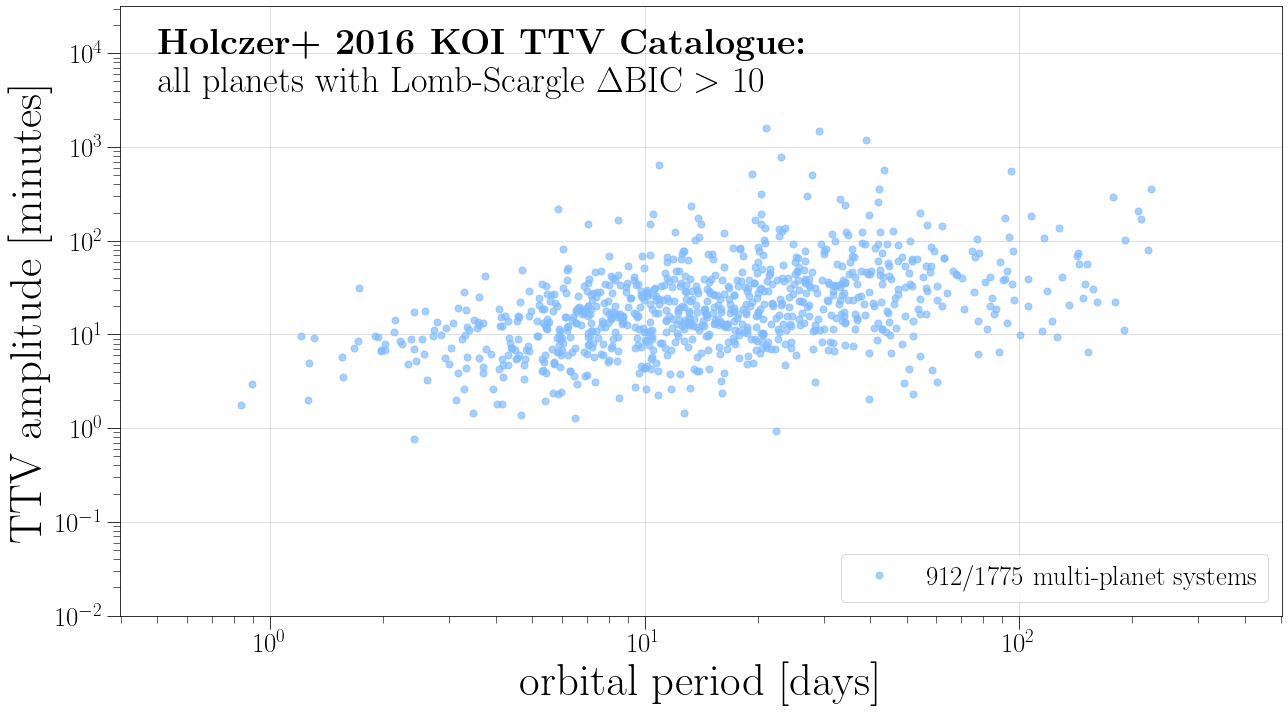

In [12]:
plt.figure(figsize=[18,10])


plt.plot(ttv_multi_planet_periods, ttv_multi_planet_amplitudes, 
         marker = 'o', markersize = '7', ls = '', color = '#80bbff', alpha = .69, zorder=2,
         label = str(len(ttv_multi_planets.T)) + '/' + str(len(ttv_planets)) + ' multi-planet systems')
'''
plt.plot(ttv_single_planet_periods, ttv_single_planet_amplitudes, 
         marker = 'o', markersize = '7', ls = '', color = '#700055', alpha = .69, zorder=1,
         label = str(len(ttv_single_planets.T)) + '/' + str(len(ttv_planets)) + r' $\mathbf{not}$ known multis')


plt.plot(np.log10(np.array(ttv_planets).T[0]), np.log10(np.array(ttv_planets).T[1]), 
         marker = 'o', markersize = '7', ls = '', color = 'k', alpha = .69, zorder=2,
         label = str(len(ttv_planets)) + ' known TTV systems')
'''

plt.xlabel(r'orbital period [days]', fontsize=45)
plt.ylabel(r'TTV amplitude [minutes]', fontsize=45)
plt.text(10**(-0.3),10**(4.0),r'\textbf{Holczer+ 2016 KOI TTV Catalogue:}', fontsize=36)
plt.text(10**(-0.3),10**(3.6),'all planets with Lomb-Scargle $\Delta$BIC $>$ 10', fontsize=36)
plt.xticks(fontsize=27)
plt.yticks(fontsize=27)
plt.legend(fontsize=27, loc=4)

plt.yscale('log')
plt.xscale('log')

# Increase the size of minor ticks on both x and y axes
plt.tick_params(which='minor', size=7)  # Adjust the size as per your preference
plt.tick_params(which='major', size=13)  # Adjust the size as per your preference

# Turn on the grid
plt.grid(True, alpha=.5)


plt.ylim(10**(-2),10**(4.5))
plt.xlim(10**(-.4),10**(2.7))

plt.tight_layout()

#plt.savefig('holczer_ttvs_multis.pdf')

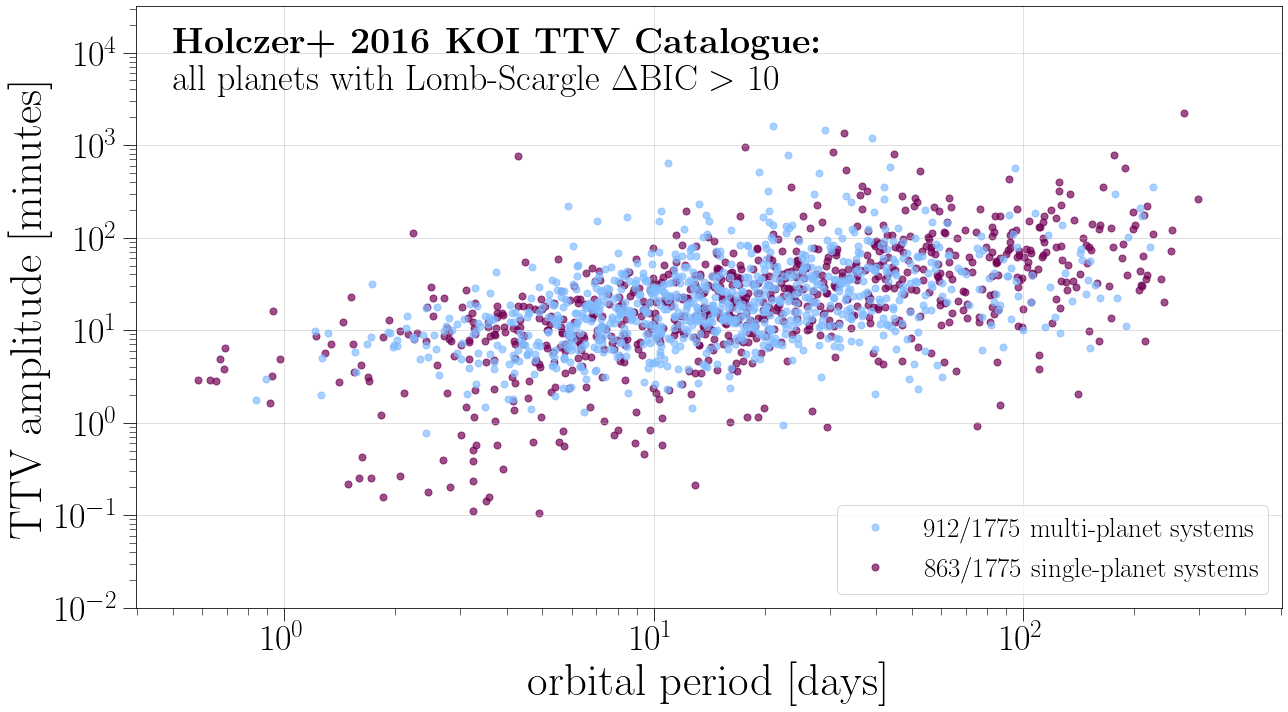

In [13]:

plt.figure(figsize=[18,10])


plt.plot(ttv_multi_planet_periods, ttv_multi_planet_amplitudes, 
         marker = 'o', markersize = '7', ls = '', color = '#80bbff', alpha = .69, zorder=2,
         label = str(len(ttv_multi_planets.T)) + '/' + str(len(ttv_planets)) + ' multi-planet systems')

plt.plot(ttv_single_planet_periods, ttv_single_planet_amplitudes, 
         marker = 'o', markersize = '7', ls = '', color = '#700055', alpha = .69, zorder=1,
         label = str(len(ttv_single_planets.T)) + '/' + str(len(ttv_planets)) + r' single-planet systems')

'''
plt.plot(np.log10(np.array(ttv_planets).T[0]), np.log10(np.array(ttv_planets).T[1]), 
         marker = 'o', markersize = '7', ls = '', color = 'k', alpha = .69, zorder=2,
         label = str(len(ttv_planets)) + ' known TTV systems')
'''

plt.xlabel(r'orbital period [days]', fontsize=45)
plt.ylabel(r'TTV amplitude [minutes]', fontsize=45)
plt.text(10**(-0.3),10**(4.0),r'\textbf{Holczer+ 2016 KOI TTV Catalogue:}', fontsize=36)
plt.text(10**(-0.3),10**(3.6),'all planets with Lomb-Scargle $\Delta$BIC $>$ 10', fontsize=36)

plt.legend(fontsize=27, loc=4)

plt.yscale('log')
plt.xscale('log')

# Increase the size of minor ticks on both x and y axes
plt.tick_params(which='minor', size=7)  # Adjust the size as per your preference
plt.tick_params(which='major', size=13)  # Adjust the size as per your preference

# Turn on the grid
plt.grid(True, alpha=.5)


plt.ylim(10**(-2),10**(4.5))
plt.xlim(10**(-.4),10**(2.7))

plt.tight_layout()

#plt.savefig('holczer_ttvs_singles_vs_multis.pdf')

In [ ]:
plt.figure(figsize=[18,10])

'''
plt.plot(ttv_multi_planet_periods, ttv_multi_planet_amplitudes, 
         marker = 'o', markersize = '7', ls = '', color = '#80bbff', alpha = .69, zorder=2,
         label = str(len(ttv_multi_planets.T)) + '/' + str(len(ttv_planets)) + ' known multis')
'''

plt.plot(ttv_single_planet_periods, ttv_single_planet_amplitudes, 
         marker = 'o', markersize = '7', ls = '', color = '#700055', alpha = .69, zorder=1,
         label = str(len(ttv_single_planets.T)) + '/' + str(len(ttv_planets)) + r' $\mathbf{not}$ known multis')

'''
plt.plot(np.log10(np.array(ttv_planets).T[0]), np.log10(np.array(ttv_planets).T[1]), 
         marker = 'o', markersize = '7', ls = '', color = 'k', alpha = .69, zorder=2,
         label = str(len(ttv_planets)) + ' known TTV systems')
'''

plt.xlabel(r'orbital period [days]', fontsize=45)
plt.ylabel(r'TTV amplitude [minutes]', fontsize=45)
plt.text(10**(-0.3),10**(4.0),r'\textbf{Holczer+ 2016 KOI TTV Catalogue:}', fontsize=36)
plt.text(10**(-0.3),10**(3.6),'all planets with Lomb-Scargle $\Delta$BIC $>$ 10', fontsize=36)
plt.xticks(fontsize=27)
plt.yticks(fontsize=27)
plt.legend(fontsize=27, loc=4)

plt.yscale('log')
plt.xscale('log')

# Increase the size of minor ticks on both x and y axes
plt.tick_params(which='minor', size=7)  # Adjust the size as per your preference
plt.tick_params(which='major', size=13)  # Adjust the size as per your preference

# Turn on the grid
plt.grid(True, alpha=.5)


plt.ylim(10**(-2),10**(4.5))
plt.xlim(10**(-.4),10**(2.7))

plt.tight_layout()

#plt.savefig('holczer_ttvs_singles.pdf')